## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

## Loading Images

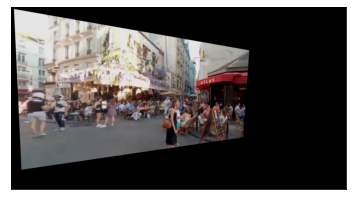

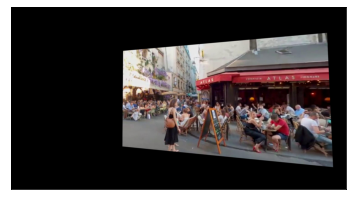

In [2]:
def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    
    Parameters:
    -------------
    
    img: (numpy.ndarray) input image
    
    title: (str, optional) title of the image
    
    save: (bool, optional) if you want to save figure make this True
    
    name: (str, optional) name of the image you want to save
    
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        iio.imwrite(name, img)
    plt.show()
    
img0 = iio.imread('q2_0.jpg')
img1 = iio.imread('q2_1.jpg')

show_image(img0)
show_image(img1)

## Find Overlap Region

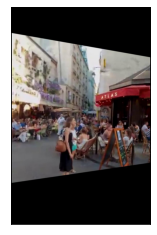

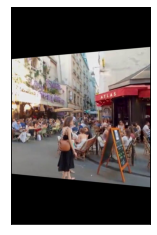

In [3]:
show_image(img0[:,750:1521,:])
show_image(img1[:,750:1521,:])

## Boundary Cut

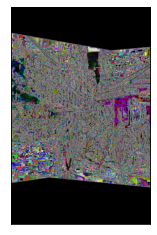

In [4]:
e = (img0[:,750:1521,:]-img1[:,750:1521,:])**2
show_image(e)

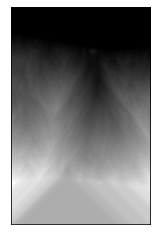

In [5]:
H = np.mean(e.copy(), axis=2) # an array for saving weights of every path

for i in range(e.shape[0]):
    if i == 0:
        continue
    for j in range(e.shape[1]):
        if j == 0:
            H[i,j] = H[i,j] + np.min([H[i-1,j], H[i-1,j+1]])
        elif j == e.shape[1] - 1:
            H[i,j] = H[i,j] + np.min([H[i-1,j], H[i-1,j-1]])
        else:
            H[i,j] = H[i,j] + np.min([H[i-1,j], H[i-1,j+1], H[i-1,j-1]])
            
show_image(H)

In [6]:
ls = [] # a list for saving boundary
for i in range(H.shape[0]):
    j = H.shape[0] - i - 1
    if j == H.shape[0] - 1:
        x = np.argmin(H[j,:])
        ls.append((j, x))
    else:
        (y, x) = ls[-1]
        if x == 0:
            val = np.min([H[j,x], H[j,x+1]])
            if val == H[j,x]:
                ls.append((j, x))
            else:
                ls.append((j, x+1))
        elif x == H.shape[1] - 1:
            val = np.min([H[j,x], H[j,x-1]])
            if val == H[j,x]:
                ls.append((j, x))
            else:
                ls.append((j, x-1))
        else:
            val = np.min([H[j,x], H[j,x+1], H[j,x-1]])
            if val == H[j,x]:
                ls.append((j, x))
            elif val == H[j, x+1]:
                ls.append((j, x+1))
            else:
                ls.append((j, x-1))

## Show Path on Images

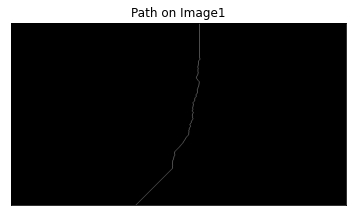

In [25]:
img2 = np.zeros(img0.shape, dtype='uint8') # a copy of img0
ls1 = [] # a list for saving path from the origin of the img0
for i in range(len(ls)):
    ls1.append((ls[i][0], ls[i][1]+750))
for it in ls1:
    img2[it[0], it[1]:it[1]+2, :] = 255
    
show_image(img2, title='Path on Image1', save=True, name='boarder.jpg')

## Apply Method

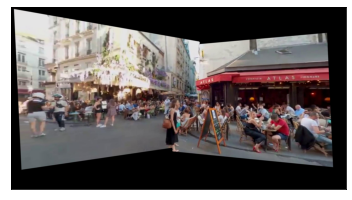

In [26]:
img = img0.copy()
for ind in range(len(ls1)):
    img[ls1[ind][0], ls1[ind][1]:, :] = img1[ls1[ind][0], ls1[ind][1]:, :].copy()

show_image(img, save=True, name='res_q2.jpg')